In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd, numpy as np
import os, requests, json, warnings
import plotnine as pn

import steam

In [5]:

reviews = steam.ReviewData()
reviews.load()

In [20]:
hours = steam.HoursPlayedData()
hours.load()

In [21]:
hours.dat.groupby("record_type").size()

record_type
play    70489
dtype: int64

In [22]:
hours.dat

,steamid,name,record_type,hours_played
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199991,128470551,Fallen Earth,play,2.4
199993,128470551,Magic Duels,play,2.2
199995,128470551,Titan Souls,play,1.5
199997,128470551,Grand Theft Auto Vice City,play,1.5


In [9]:
reviews.dat.groupby('rating').size()

rating
False     938152
True     6941530
dtype: int64

In [ ]:
## Do repeated draws from each group, and calculate each ventile like 30 times. Then plot the average ventiles against each other.

In [6]:
reviews.dat.groupby('rating')['hours_played'].mean()

rating
False    10577.015633
True     11046.615460
Name: hours_played, dtype: float64

In [12]:
(
    pn.ggplot(reviews.dat, pn.aes(x='playtime_at_review')) +
    pn.geom_histogram(bins=100) +
    pn.facet_wrap('rating', ncol=1) +
    pn.theme_bw())

/home/mson/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


KeyboardInterrupt: 

In [5]:
review_counter = steam.ReviewCounter(reviews.dat)

In [6]:
review_counter.positive_negative_ratios_dat

,name,voted_up_pos,reviews_pos,total_reviews_pos,prop_pos,voted_up_neg,reviews_neg,total_reviews_neg,prop_neg,rr
5733,Hello Charlotte,True,153,7879682,1.941703e-05,False,1,7879682,1.269087e-07,153.000000
6465,Tetrobot and Co.,True,111,7879682,1.408686e-05,False,1,7879682,1.269087e-07,111.000000
4973,Open Sorcery,True,222,7879682,2.817373e-05,False,2,7879682,2.538173e-07,111.000000
37,Portal 2,True,86880,7879682,1.102583e-02,False,963,7879682,1.222131e-04,90.218069
105,Portal,True,35312,7879682,4.481399e-03,False,485,7879682,6.155071e-05,72.808247
...,...,...,...,...,...,...,...,...,...,...
9303,Clickdraw Clicker,True,1,7879682,1.269087e-07,False,7,7879682,8.883607e-07,0.142857
8982,587590,True,3,7879682,3.807260e-07,False,22,7879682,2.791991e-06,0.136364
5542,Skyscraper Simulator,True,23,7879682,2.918900e-06,False,170,7879682,2.157447e-05,0.135294
5170,Citadels,True,25,7879682,3.172717e-06,False,204,7879682,2.588937e-05,0.122549


In [ ]:
reviews.user_game_matrix.report_stats()

% cells with a value: 0.07%
Most active user rated 392 games.
Least active user rated 1 games.
Most rated game has 976132 ratings.
Least rated game has 1 ratings.


/home/mson/.local/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 39'. Pick better value with 'binwidth'.


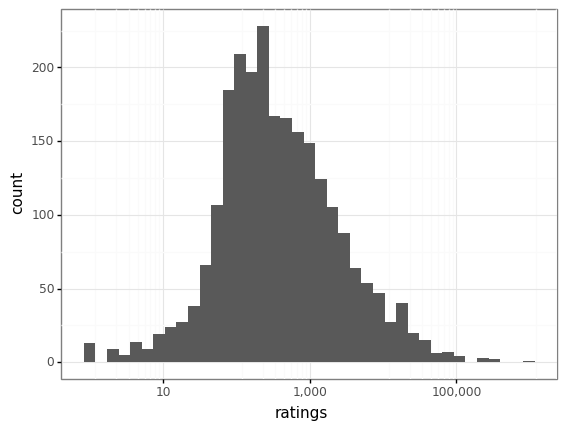

<ggplot: (8792136360174)>

In [36]:
reviews.user_game_matrix.ratings_per_game_plot

In [59]:
pd.set_option('display.float_format', str)
pd.set_option('display.max_rows', 500)


In [60]:
(
    pd.DataFrame(reviews.user_game_matrix.ratings_per_user, columns=['ratings'])
    .groupby('ratings')
    .size()
    .reset_index(name='count')
    .assign(total=lambda d: d['count'].sum(),
            prop=lambda d: d['count'] / d['total'],
            cumu_prop=lambda d: d['prop'].cumsum()))


,ratings,count,total,prop,cumu_prop
0,1,3277929,4577870,0.7160380264183999,0.7160380264183999
1,2,697558,4577870,0.15237610504448576,0.8684141314628856
2,3,258819,4577870,0.056536992094576737,0.9249511235574623
3,4,122434,4577870,0.026744752472219614,0.951695876029682
4,5,67669,4577870,0.01478176531880547,0.9664776413484875
5,6,41339,4577870,0.009030182158951652,0.9755078235074391
6,7,27325,4577870,0.00596893315013314,0.9814767566575723
7,8,18420,4577870,0.004023705347683529,0.9855004620052558
8,9,13352,4577870,0.0029166402715673444,0.9884171022768231
9,10,9853,4577870,0.0021523110092685027,0.9905694132860916
